In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import scikit_posthocs as sp
from scipy.stats import mannwhitneyu
import numpy as np
from upsetplot import UpSet

In [8]:
# Import the excel table including the identified features showing significant differences 
features = pd.read_csv("C:/Users/luise/Jupyter_Code/Acetylcholine_Laura_Project/KW_significant_features.csv")

In [9]:
features

,Organ,Feature,H value,p value,inf_abx \nvs \nuninf_abx,inf_control \nvs \nuninf_control,inf_abx \nvs \ninf_control,uninf_abx \nvs \nuninf_control,inf_abx \nvs \nuninf_abx.1,inf_control \nvs \nuninf_control.1,inf_abx\n vs \ninf_control,uninf_abx\n vs \nuninf_control
0,Adipose,X160.133_0.288_2231,14.381538,0.002429,NaN,0.001315,0.030486,NaN,NaN,increased,decreased,NaN
1,Adipose,X162.112_0.268_93,13.620085,0.003471,NaN,0.014019,0.024745,NaN,NaN,increased,increased,NaN
2,Adipose,X232.154_0.89_3136,8.795385,0.032139,NaN,0.011330,NaN,NaN,NaN,increased,NaN,NaN
3,Adipose,X246.17_2.123_2303,10.761624,0.013087,NaN,0.011330,NaN,0.037635,NaN,increased,NaN,increased
4,Adipose,X372.309_2.805_2542,9.707692,0.021221,NaN,NaN,NaN,0.002827,NaN,NaN,NaN,decreased
...,...,...,...,...,...,...,...,...,...,...,...,...
76,UpperStomach,X218.138_0.462_4069,13.256752,0.004113,NaN,NaN,0.025748,0.004586,NaN,NaN,decreased,decreased
77,UpperStomach,X246.17_2.123_2303,10.410085,0.015383,NaN,0.045155,NaN,0.004586,NaN,decreased,NaN,decreased
78,UpperStomach,X232.154_0.89_3136,22.478291,0.000052,NaN,NaN,0.016011,0.000183,NaN,NaN,decreased,decreased
79,UpperStomach,X244.154_2.004_9453,12.010855,0.007346,NaN,NaN,NaN,0.005795,NaN,NaN,NaN,decreased


In [10]:
# Produce Dataframe
features_df = pd.DataFrame(features)

In [44]:
### Produce a list including the features of each Organ 

# Initialize an empty list to store strings
adipose = []

# Iterate through the rows of the dataframe
for index, row in features.iterrows():
    # Check if 'Adipose' is present in the 'Organ' column
    if 'Adipose' in row['Organ']:
        # Add the corresponding string from the 'Feature' column to the list
        adipose.append(row['Feature'])
        
cecum = []
for index, row in features.iterrows():
    if 'Cecum' in row['Organ']:
        cecum.append(row['Feature'])
        
distalColon = []
for index, row in features.iterrows():
    if 'DistalColon' in row['Organ']:
        distalColon.append(row['Feature'])
        
duodenum = []
for index, row in features.iterrows():
    if 'Duodenum' in row['Organ']:
        duodenum.append(row['Feature'])
        
esophagus = []
for index, row in features.iterrows():
    if 'Esophagus' in row['Organ']:
        esophagus.append(row['Feature'])
        
heartA = []
for index, row in features.iterrows():
    if 'HeartA' in row['Organ']:
        heartA.append(row['Feature'])
        
heartB = []
for index, row in features.iterrows():
    if 'HeartB' in row['Organ']:
        heartB.append(row['Feature'])
        
heartC = []
for index, row in features.iterrows():
    if 'HeartC' in row['Organ']:
        heartC.append(row['Feature'])
        
heartD = []
for index, row in features.iterrows():
    if 'HeartD' in row['Organ']:
        heartD.append(row['Feature'])
        
ileum = []
for index, row in features.iterrows():
    if 'Ileum' in row['Organ']:
        ileum.append(row['Feature'])
        
jejunum = []
for index, row in features.iterrows():
    if 'Jejunum' in row['Organ']:
        jejunum.append(row['Feature'])
        
liver = []
for index, row in features.iterrows():
    if 'Liver' in row['Organ']:
        liver.append(row['Feature'])
        
lowerStomach = []
for index, row in features.iterrows():
    if 'LowerStomach' in row['Organ']:
        lowerStomach.append(row['Feature'])
        
proximalColon = []
for index, row in features.iterrows():
    if 'ProximalColon' in row['Organ']:
        proximalColon.append(row['Feature'])
        
upperStomach = []
for index, row in features.iterrows():
    if 'UpperStomach' in row['Organ']:
        upperStomach.append(row['Feature'])

<Figure size 4000x2000 with 0 Axes>

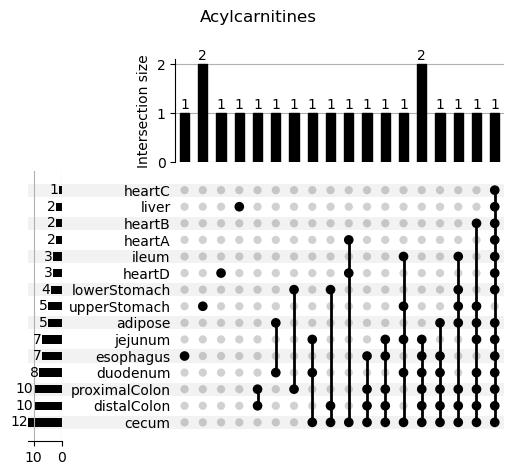

In [122]:
# Create a table including all the Feature lists of the Organs
set_names = ['adipose', 'cecum', 'distalColon', 'duodenum', 'esophagus', 'heartA', 'heartB', 'heartC', 'heartD', 'ileum', 'jejunum', 'liver', 'lowerStomach', 'proximalColon', 'upperStomach']

# Create a list including all the Organ names
sets = [adipose, cecum, distalColon, duodenum, esophagus, heartA, heartB, heartC, heartD, ileum, jejunum, liver, lowerStomach, proximalColon, upperStomach]
Organs = list(set().union(*sets))

# Create a DataFrame with True/False values indicating the presence of each feature in each set
set_names_boolean_df = pd.DataFrame({set_name: [feature in st for feature in Organs] for set_name, st in zip(set_names, sets)})

# Calculate the intersection size for each combination of sets
df_up = set_names_boolean_df.groupby(set_names).size()

# Plot the UpSet plot
upset_plot = UpSet(df_up, orientation='horizontal',show_counts=True, element_size=17) 
plt.figure(figsize = (40, 20))
upset_plot.plot()
plt.suptitle("Acylcarnitines")

# Display the plot
plt.show()

In [100]:
set_names

['adipose',
 'cecum',
 'distalColon',
 'duodenum',
 'esophagus',
 'heartA',
 'heartB',
 'heartC',
 'heartD',
 'ileum',
 'jejunum',
 'liver',
 'lowerStomach',
 'proximalColon',
 'upperStomach']

In [101]:
sets

[['X160.133_0.288_2231',
  'X162.112_0.268_93',
  'X232.154_0.89_3136',
  'X246.17_2.123_2303',
  'X372.309_2.805_2542'],
 ['X160.133_0.288_2231',
  'X204.123_0.286_397',
  'X218.138_0.462_4069',
  'X232.154_0.89_3136',
  'X246.17_2.123_2303',
  'X260.186_2.329_4185',
  'X344.278_2.711_9510',
  'X372.309_2.805_2542',
  'X398.324_2.842_3106',
  'X400.34_2.892_2268',
  'X426.356_2.921_2337',
  'X428.371_2.985_3385'],
 ['X160.133_0.288_2231',
  'X230.138_0.671_7383',
  'X232.154_0.89_3136',
  'X246.17_2.123_2303',
  'X344.278_2.711_9510',
  'X372.309_2.805_2542',
  'X398.324_2.842_3106',
  'X400.34_2.892_2268',
  'X426.356_2.921_2337',
  'X428.371_2.985_3385'],
 ['X160.133_0.288_2231',
  'X162.112_0.268_93',
  'X204.123_0.286_397',
  'X218.138_0.462_4069',
  'X246.17_2.123_2303',
  'X372.309_2.805_2542',
  'X400.34_2.892_2268',
  'X428.371_2.985_3385'],
 ['X426.356_2.921_2337',
  'X400.34_2.892_2268',
  'X398.324_2.842_3106',
  'X160.133_0.288_2231',
  'X456.402_3.089_3490',
  'X428.371_2

In [94]:
set_names_boolean_df

,adipose,cecum,distalColon,duodenum,esophagus,heartA,heartB,heartC,heartD,ileum,jejunum,liver,lowerStomach,proximalColon,upperStomach
0,False,True,True,False,True,False,False,False,False,False,True,False,False,True,False
1,False,True,False,True,False,False,False,False,False,True,True,False,False,False,True
2,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False
5,True,True,True,False,False,False,False,False,False,True,False,False,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
7,False,True,True,True,True,False,False,False,False,False,True,False,False,True,False
8,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [95]:
Organs

['X398.324_2.842_3106',
 'X218.138_0.462_4069',
 'X204.123_0.286_397',
 'X232.154_0.803_11855',
 'X426.356_2.921_2337',
 'X232.154_0.89_3136',
 'X160.133_0.288_2231',
 'X400.34_2.892_2268',
 'X344.278_2.711_9510',
 'X204.123_0.354_11229',
 'X246.17_2.123_2303',
 'X428.371_2.985_3385',
 'X204.139_0.283_3654',
 'X260.186_2.329_4185',
 'X372.309_2.805_2542',
 'X162.112_0.268_93',
 'X266.138_2.197_3777',
 'X230.138_0.671_7383',
 'X456.402_3.089_3490',
 'X244.154_2.004_9453']